In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando dataset
dataset = pd.read_excel("dataset/Real estate valuation data set.xlsx", engine='openpyxl')
dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
# # Separando X e y
raw = dataset.iloc[:, 0::].T

matrix = np.array(raw)
X = matrix[1:7] # shape n×(k+1)
y = matrix[-1] # shape n×1

X = X.T
y = y.T

X.shape, y.shape

((414, 6), (414,))

In [5]:
# Funções de ativação para o neurônio
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'softmax':
        exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
        return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)
    elif type == 'tanh':
        return np.tanh(matrix)

# Função de treino do MLP
def mlp_train(X, y, n_neurons_hlayer, epochs, l_rate, criteria):

    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X = np.column_stack((np.ones(X.shape[0]), X))

    # y = (y - np.mean(y)) / np.std(y)
    y = y.reshape(-1, 1)

    # print(X, y)
    n_features = X.shape[1]

    w_input = np.random.randn(n_features, n_neurons_hlayer) * np.sqrt(2/n_features)
    w_output = np.random.randn(n_neurons_hlayer, 1) * np.sqrt(2/n_neurons_hlayer)

    bias_input = np.random.randn(n_neurons_hlayer, 1) * 0.5
    bias_output = np.random.randn(1, 1) * 0.5

    wait = 0
    for epoch in range(epochs):
        # Forward
        Zin = np.dot(X, w_input) + bias_input.T
        result_in = activate_functions('tanh', Zin)

        Zout = np.dot(result_in, w_output) + bias_output.T
        result_out = Zout

        # Backpropagation

        # Passo 2 - Backpropagation
        error_out = result_out - y
        grad_out = error_out / len(X)

        error_in = np.dot(grad_out, w_output.T)
        grad_in = error_in * result_in * (1 - result_in)

        # Ajustar os pesos e os viéses
        w_input -= l_rate * (np.dot(X.T, grad_in)/ len(X))
        w_output -= l_rate * (np.dot(result_in.T, grad_out)/ len(X))

        bias_input -= l_rate * np.sum(grad_in/ len(X), axis=0, keepdims=True).T
        bias_output -= l_rate * np.sum(grad_out/ len(X), axis=0, keepdims=True).T

        if epoch == 0:
            loss = np.mean((y - result_out)**2)
            print('Initial Epoch: {}, loss: {}'.format(epoch, loss))
            best_loss = loss

        if epoch % 1000==0: l_rate = l_rate / 2.1
        if epoch != 0 and epoch % 100 == 0:
            loss = np.mean((y - result_out)**2)
            print('Epoch: {}, loss: {}'.format(epoch, loss))

            if loss < best_loss:
                best_loss = loss
                wait = 0
            else: wait += 1

            if wait >= criteria:
                print('Final Epoch (loss stopped): {}, loss: {}'.format(epoch, loss))
                return w_input, w_output, bias_input, bias_output

    loss = np.mean((y - result_out)**2)
    print('Last Epoch: {}, loss: {}'.format(epoch+1, loss))

    return w_input, w_output, bias_input, bias_output

w_input, w_output, bias_input, bias_output = mlp_train(X, y, n_neurons_hlayer=414, epochs=10000, l_rate=0.99, criteria=10)


Initial Epoch: 0, loss: 1605.875703294024
Epoch: 100, loss: 95.82577311061895
Epoch: 200, loss: 89.04757064266937
Epoch: 300, loss: 92.94553358609183
Epoch: 400, loss: 182.49758486111517
Epoch: 500, loss: 650.2536278060294
Epoch: 600, loss: 86.0438743629002
Epoch: 700, loss: 71.87810476034772
Epoch: 800, loss: 68.24830408627467
Epoch: 900, loss: 68.06996115045352
Epoch: 1000, loss: 68.50694671996311
Epoch: 1100, loss: 69.18370803407129
Epoch: 1200, loss: 68.53847647151068
Epoch: 1300, loss: 66.30109682720986
Epoch: 1400, loss: 64.07266274046661
Epoch: 1500, loss: 62.85654985750433
Epoch: 1600, loss: 62.75501760554266
Epoch: 1700, loss: 62.87851341620601
Epoch: 1800, loss: 62.28548996163323
Epoch: 1900, loss: 60.873514073905675
Epoch: 2000, loss: 60.23822657455269
Epoch: 2100, loss: 60.188891374217604
Epoch: 2200, loss: 60.23737941828916
Epoch: 2300, loss: 60.31647231625781
Epoch: 2400, loss: 60.37545579667524
Epoch: 2500, loss: 60.405049497028
Epoch: 2600, loss: 60.413378749599254
Epoc

In [6]:
# Função de predição do MLP
def mlp_predict(X, w_in, w_out, bias_in, bias_out):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Forward
    Zin = (X @ w_in) + bias_in.T
    result_in = activate_functions('tanh', Zin)

    Zout = (result_in @ w_out) + bias_out.T
    result_out = Zout
    
    return result_out

# Realizar a predição no conjunto de teste
y_pred = mlp_predict(X, w_input, w_output, bias_input, bias_output)

print(y_pred.shape)
print(y.shape)


(414, 1)
(414,)


In [7]:
from sklearn.metrics import r2_score

# Avaliar o desempenho do regressor
r2 = r2_score(y, y_pred)

print("R²: {}".format(r2))

R²: 0.6862381625253073


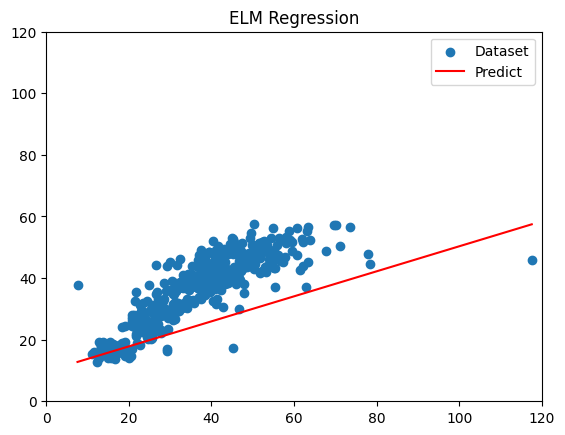

In [8]:
plt.scatter(y, y_pred, label='Dataset')
plt.plot([np.min(y), np.max(y)], [np.min(y_pred), np.max(y_pred)], color='red', label='Predict')
plt.title('ELM Regression')
plt.legend()
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()